In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.tsa.stattools import acovf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from wealth_optimizer.bootstrap import generate_stationary_bootstrap_path
from wealth_optimizer.optimal_window_selection import get_optimal_block_size_stationary_bootstrap
from wealth_optimizer.optimal_window_selection import get_optimal_block_size_circular_bootstrap

In [2]:
raw_data = pd.read_excel('two_uncorrelated_gbms_scenario_1.xlsx', index_col=0)

In [3]:
returns_data = raw_data['asset_2'].to_numpy()

In [4]:
display(returns_data)

array([-0.00852355, -0.00970233,  0.03444904, ..., -0.07923091,
       -0.04590817,  0.03662658])

In [5]:
len(returns_data)

5199

<IPython.core.display.Javascript object>


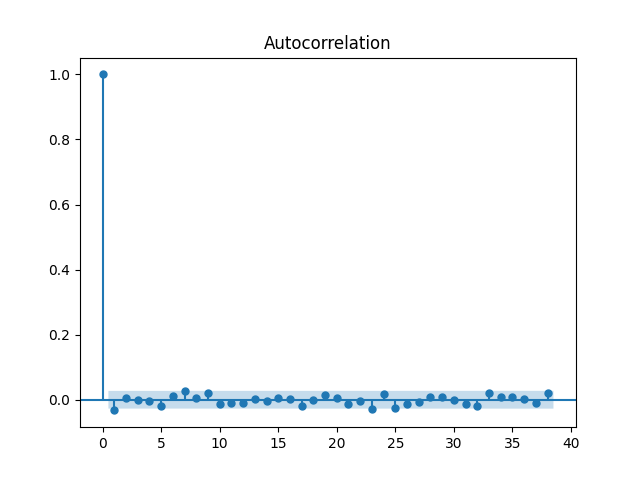

In [7]:
gmb_acf_fig = plot_acf(returns_data)

In [8]:
gmb_acf_fig.savefig('gmb_acf_fig.png')

<IPython.core.display.Javascript object>


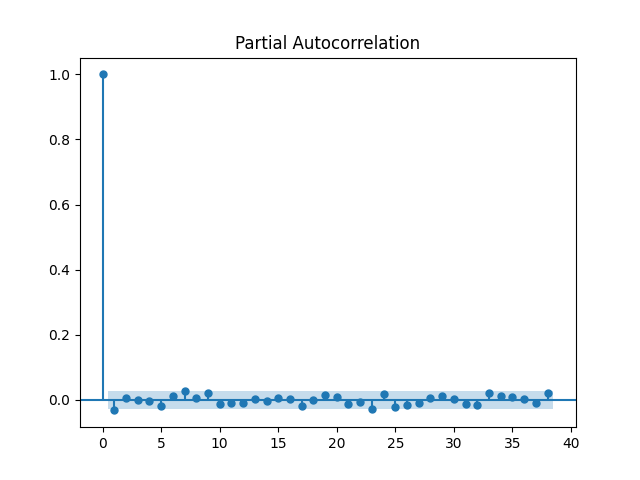

In [9]:
gmb_pacf_fig = plot_pacf(returns_data)

In [10]:
gmb_pacf_fig.savefig('gmb_pacf_fig.png')

In [11]:
get_optimal_block_size_stationary_bootstrap(returns_data)

19

<IPython.core.display.Javascript object>


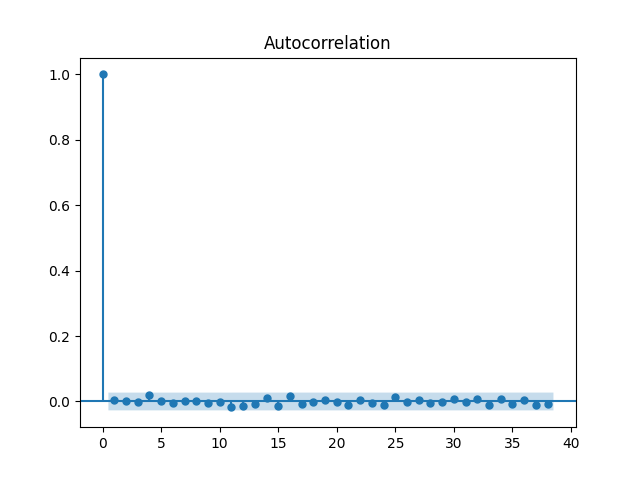

In [12]:
gmb_acf_sq_fig = plot_acf(returns_data ** 2)

<IPython.core.display.Javascript object>


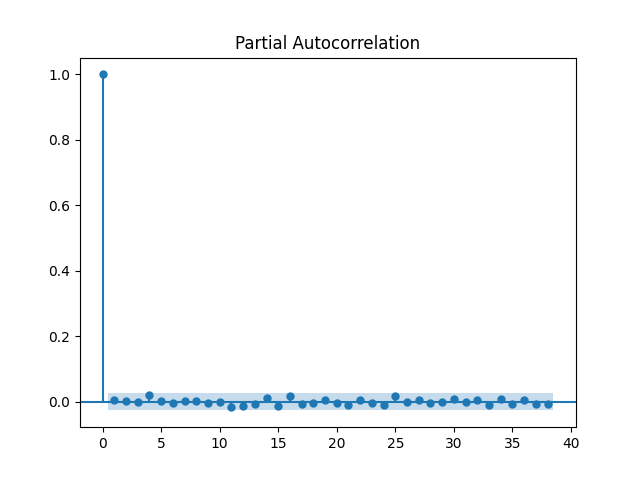

In [13]:
gmb_pacf_sq_fig = plot_pacf(returns_data ** 2)

In [ ]:
get_optimal_block_size_circular_bootstrap(returns_data)

In [14]:
num_paths = 1000

In [15]:
paths = []  # list of numpy arrays
acfs = []
pacfs = []

In [16]:
for i in range(num_paths):
    if i % 100 == 0:
        print('path', i)
    path = generate_stationary_bootstrap_path(raw_data, expected_block_size = 1, n_req=100)[:,1]
    auto_corrs = acf(path, nlags=20)
    partial_auto_corrs = pacf(path, nlags=20)
    paths.append(path)
    acfs.append(auto_corrs)
    pacfs.append(partial_auto_corrs)

path 0


C:\Users\Vesko\anaconda3\envs\thesis\lib\site-packages\statsmodels\tsa\stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


path 100
path 200
path 300
path 400
path 500
path 600
path 700
path 800
path 900


In [ ]:
lag_1_acfs = [x[1] for x in acfs]

In [ ]:
np.mean(lag_1_acfs)

In [ ]:
np.mean([x[10] for x in acfs])

In [ ]:
np.mean([x[0] for x in pacfs])

In [ ]:
np.mean([x[1] for x in pacfs])

In [ ]:
np.mean([x[2] for x in pacfs])

In [17]:
average_acfs = []
average_pacfs = []
lags = []

In [18]:
for lag in range(20):
    lags.append(lag)
    average_acfs.append(np.mean([x[lag] for x in acfs]))
    average_pacfs.append(np.mean([x[lag] for x in pacfs]))

<IPython.core.display.Javascript object>


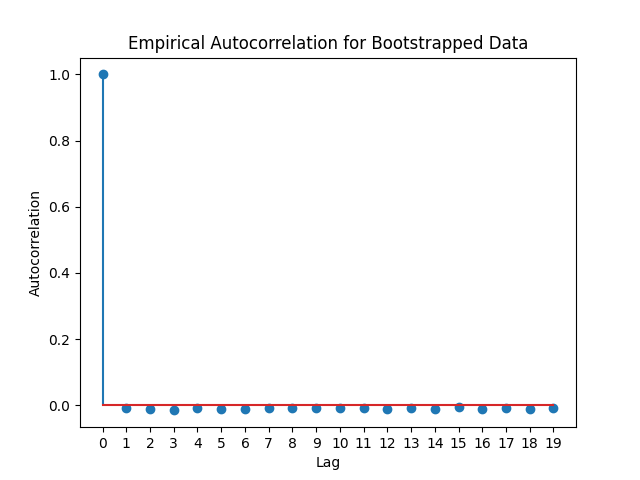

In [20]:
fig1, ax = plt.subplots()
# plt.plot(lags, average_acfs, marker='o', linestyle='None')
plt.stem(lags, average_acfs) #, marker='o', linestyle='None')
plt.title('Empirical Autocorrelation for Bootstrapped Data')
plt.xlabel('Lag')
ax.set_xticks(lags, minor=False)
plt.ylabel('Autocorrelation')
fig1.savefig('gbm_acf_sb.png')

<IPython.core.display.Javascript object>


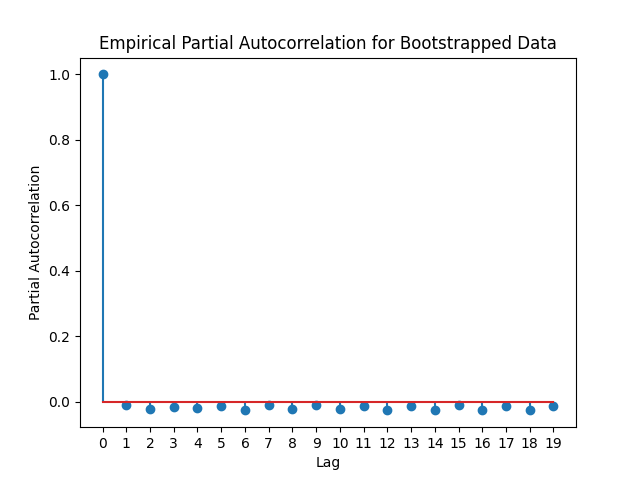

In [21]:
fig2, ax = plt.subplots()
# plt.plot(lags, average_acfs, marker='o', linestyle='None')
plt.stem(lags, average_pacfs) #, marker='o', linestyle='None')
plt.title('Empirical Partial Autocorrelation for Bootstrapped Data')
plt.xlabel('Lag')
ax.set_xticks(lags, minor=False)
plt.ylabel('Partial Autocorrelation')
fig2.savefig('gbm_pacf_sb.png')